In [74]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
import torch
from dataset import Model10NetDataset
from model import TNet, PointNet

In [76]:
torch.cuda.is_available()

True

In [77]:
dataset = Model10NetDataset(path="./ModelNet10", data_augmentation=True)

In [78]:
Model10NetDataset.CLASSES_MAP

{'bathtub': 0,
 'bed': 1,
 'chair': 2,
 'desk': 3,
 'dresser': 4,
 'monitor': 5,
 'night_stand': 6,
 'sofa': 7,
 'table': 8,
 'toilet': 9}

In [79]:
K = 0
dataset[K]

(tensor([[-0.8700,  0.7069,  0.1399],
         [ 0.7836, -0.4614, -0.5878],
         [ 0.9382, -0.0860, -0.4272],
         ...,
         [ 0.3160, -0.1880, -0.8184],
         [ 0.1874,  0.9574,  0.2632],
         [-0.3950, -0.4785, -1.0482]]),
 0)

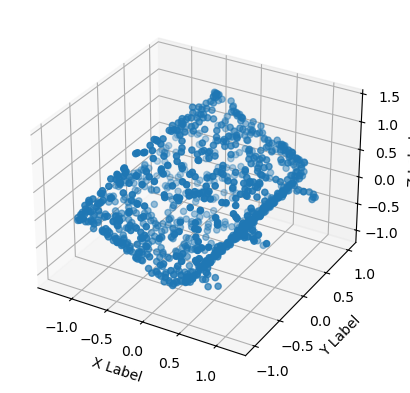

In [83]:
#%%
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Example point cloud data
# Each point is a tuple (x, y, z)
point_cloud = dataset[K][0]

# Extracting x, y, and z coordinates
x_coords = [point[0] for point in point_cloud]
y_coords = [point[1] for point in point_cloud]
z_coords = [point[2] for point in point_cloud]

# Creating a new figure
fig = plt.figure()

# Adding a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(x_coords, y_coords, z_coords)

# Setting labels (optional)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Show plot
plt.show()

In [30]:
point_cloud = dataset[0][0]
point_cloud[0].shape, point_cloud[1].shape

(torch.Size([1601, 3]), torch.Size([1417, 3]))

In [6]:
dataset[1][0].shape

[[0, 1, 2], [1, 0, 3], [4, 5, 6], [5, 4, 7], [5, 7, 8], [8, 7, 9], [8, 10, 11], [10, 8, 9], [12, 13, 14], [13, 12, 15], [15, 12, 16], [16, 12, 17], [16, 17, 18], [18, 17, 19], [13, 20, 14], [20, 13, 21], [10, 22, 11], [22, 10, 23], [22, 23, 20], [22, 20, 21], [24, 25, 26], [25, 24, 27], [28, 29, 30], [29, 28, 31], [31, 28, 32], [32, 28, 33], [32, 34, 35], [34, 32, 33], [34, 36, 35], [36, 34, 37], [36, 37, 38], [36, 38, 39], [39, 38, 40], [39, 40, 41], [29, 42, 30], [42, 29, 43], [44, 45, 46], [45, 44, 42], [45, 42, 43], [47, 46, 45], [48, 49, 50], [49, 48, 51], [52, 53, 54], [53, 52, 55], [56, 57, 58], [57, 56, 59], [60, 61, 62], [61, 60, 63], [64, 65, 66], [65, 64, 67], [68, 69, 70], [69, 68, 71], [72, 73, 74], [73, 72, 75], [76, 77, 78], [77, 76, 79], [80, 81, 82], [81, 80, 83], [84, 85, 86], [85, 84, 87], [88, 89, 90], [89, 88, 91], [92, 93, 94], [93, 92, 95], [96, 97, 98], [97, 96, 99], [100, 101, 102], [101, 100, 103], [104, 105, 106], [105, 104, 107], [108, 109, 110], [109, 108, 

torch.Size([124, 3])

In [84]:
point_cloud = point_cloud.to("cuda")
point_cloud.shape

torch.Size([1024, 3])

In [85]:
tnet = TNet(in_features=3)
tnet = tnet.to("cuda")
tnet

TNet(
  (mlp): Sequential(
    (0): Conv1d(3, 64, kernel_size=(1,), stride=(1,))
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv1d(64, 128, kernel_size=(1,), stride=(1,))
    (4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv1d(128, 1024, kernel_size=(1,), stride=(1,))
    (7): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
  )
  (fc): Sequential(
    (0): Linear(in_features=1024, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=256, bias=True)
    (4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=9, bias=True)
  )
  (batchnorm): BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=

In [86]:
out = tnet(point_cloud)
out.shape

RuntimeError: Given groups=1, weight of size [64, 3, 1], expected input[1, 1024, 3] to have 3 channels, but got 1024 channels instead

In [ ]:
out

tensor([[[0.0000, 1.2749, 0.0000,  ..., 0.0000, 0.2662, 1.9018],
         [0.0000, 0.9713, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.5344, 0.0000, 0.6598,  ..., 0.0000, 0.3981, 1.0012],
         ...,
         [0.9243, 0.0000, 0.0000,  ..., 0.2911, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.5123,  ..., 0.7256, 0.0000, 0.0000],
         [0.6774, 0.4034, 0.0000,  ..., 0.0000, 0.8900, 0.4463]],

        [[0.0000, 1.2749, 0.0000,  ..., 0.0000, 0.2662, 1.9018],
         [0.0000, 0.9713, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.5344, 0.0000, 0.6598,  ..., 0.0000, 0.3981, 1.0012],
         ...,
         [0.9243, 0.0000, 0.0000,  ..., 0.2911, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.5123,  ..., 0.7256, 0.0000, 0.0000],
         [0.6774, 0.4034, 0.0000,  ..., 0.0000, 0.8900, 0.4463]]],
       device='cuda:0', grad_fn=<ReluBackward0>)

In [11]:
pointnet = PointNet()
pointnet = pointnet.to("cuda")
pointnet

PointNet(
  (input_transform): TNet(
    (mlp): Sequential(
      (0): Conv1d(3, 64, kernel_size=(1,), stride=(1,))
      (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv1d(64, 128, kernel_size=(1,), stride=(1,))
      (4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
      (6): Conv1d(128, 1024, kernel_size=(1,), stride=(1,))
      (7): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): ReLU()
    )
    (fc): Sequential(
      (0): Linear(in_features=1024, out_features=512, bias=True)
      (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Linear(in_features=512, out_features=256, bias=True)
      (4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
      (6): Linear(in_features=256, out_features=9, bias=Tru

In [13]:
x = pointnet(point_cloud)
x[0].shape, x[1].shape, x[2].shape

(torch.Size([2, 10]), torch.Size([2, 3, 3]), torch.Size([2, 64, 64]))